# Life Expectancy and GDP Analysis

In this project, we will visualize data about GDP and life expectancy at birth, in 6 different countries, across 15 years.

Some of the questions we will seek to answer are:

* How has GDP changed over these years?
* How has life expectancy changed?
* How do these changes vary between each country?
* Is there a relationship between GDP and life expectancy? which kind?


First, we should import the necessary libraries for this project, such as Pandas for dataframe handling, and matplotlib and seaborn for visualization.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Next, we should load our data by using pandas's read csv function.

In [2]:
df = pd.read_csv("all_data.csv")

Let's verify that the data was properly loaded, and begin exploring the types of data each column has.

In [3]:
print(df.head())
countries = df.Country.unique()
years = df.Year.unique()
print(countries)
print(years)

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


First, we will clean up our data to make it easier to work with.

The life expectancy column's name is a littlw too long. We'll rename it to make it shorter.

We will also rename "United States of America" to "USA".

It would also be helpful to adjust the GDP column so that it is in Billions of dollars. This would make the scale more understandable.

In [4]:
df.rename(columns={"Life expectancy at birth (years)": "Expectancy"}, inplace=True)

df.replace({"United States of America": "USA"}, inplace=True)

df["GDP"] = df.GDP.apply(lambda x: round((x / 1000000000), 2))

countries = df.Country.unique()

print(df.head())

  Country  Year  Expectancy    GDP
0   Chile  2000        77.3  77.86
1   Chile  2001        77.3  70.98
2   Chile  2002        77.8  69.74
3   Chile  2003        77.9  75.64
4   Chile  2004        78.0  99.21


We can see that this database includes Life Expectancy and GDP data for 6 countries: Chile, China, Germany, Mexico, USA, and Zimbabwe.

Let's start by looking at the average Life Expectancy and GDP for this time period, for each country.

In [5]:
print("Between the years 2000 and 2015:")
for country in countries:
    mean_gdp = df.GDP[df.Country == country].mean()
    mean_le = df['Expectancy'][df.Country == country].mean()
    print(country + " average Life Expectancy: " + str(mean_le) + " average GDP: " + str(mean_gdp) + ".")

Between the years 2000 and 2015:
Chile average Life Expectancy: 78.94375 average GDP: 169.789375.
China average Life Expectancy: 74.26249999999999 average GDP: 4957.71375.
Germany average Life Expectancy: 79.65625 average GDP: 3094.7756249999998.
Mexico average Life Expectancy: 75.71875 average GDP: 976.6506249999999.
USA average Life Expectancy: 78.0625 average GDP: 14075.0.
Zimbabwe average Life Expectancy: 50.09375 average GDP: 9.0625.


It would be much better to visualize this data in a chart. First, we should create a new data frame with the aggregate statistics. After the new df is made, we can plot both the GDP and Life Expectancy means.

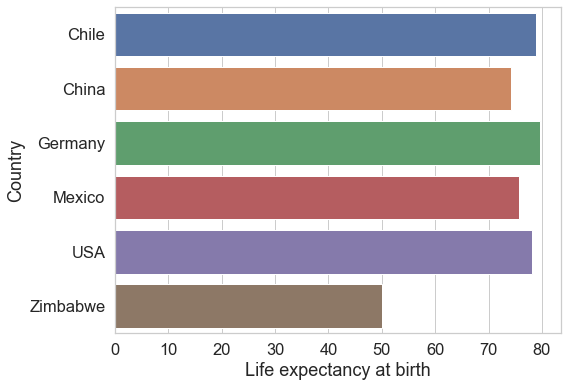

Text(0.5, 0, 'GDP (billions USD)')

<Figure size 432x288 with 0 Axes>

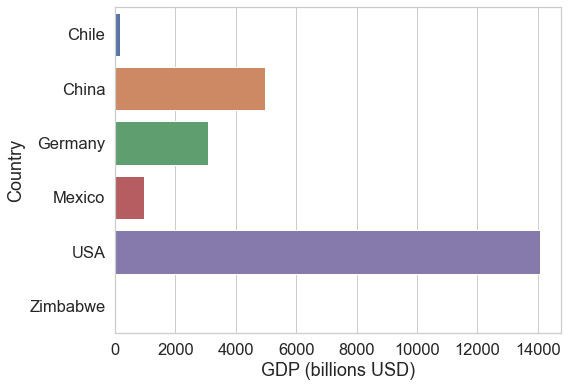

In [12]:
df_means = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()

df_means

plt.figure(figsize=(8,6))
sns.barplot(x="Expectancy", y="Country", data=df_means)
plt.xlabel("Life expectancy at birth")
plt.show()

plt.clf()

plt.figure(figsize=(8,6))
sns.barplot(x="GDP", y="Country", data=df_means)
plt.xlabel("GDP (billions USD)")


These aggregated statistics give us some information about these different countries during this period, but in order to get a more detailed understanding, we should visualize the data.

Let's start by plotting each country's GDP across these years.

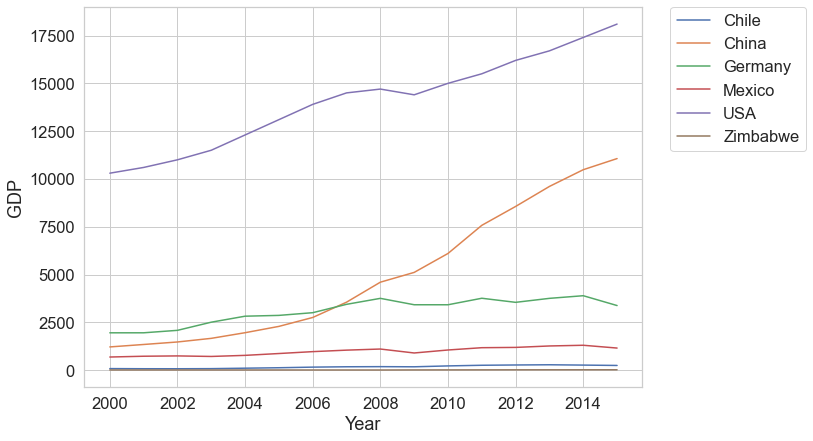

In [7]:
plt.figure(figsize=(10,7))
sns.set_theme(style="whitegrid",font_scale=1.5)
sns.lineplot(data=df, x='Year', y='GDP', hue='Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

This gives us a much clearer idea of how the GDP fluctuated in each country.

Now, let's do the same thing with Life Expectancy.

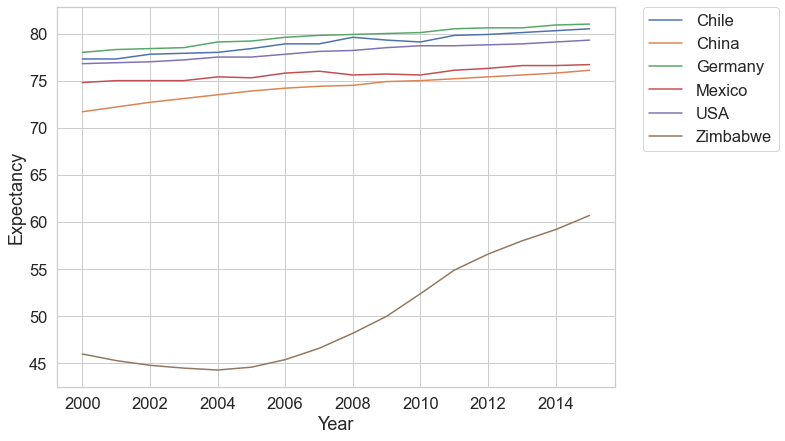

In [8]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x='Year', y='Expectancy', hue='Country')
sns.set_theme(style="whitegrid",font_scale=1.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

So far, we have been able to see the general trends for GDP and life expectancy in each country, across these fifteen years.

Let's take a deeper look into the distributions, to see what additional information we can gather.

A common way of exploring data distribution is using violin plots, because they let us see the "shape" of the data, along with its interquartile range, median, and outliers.

Text(0.5, 0, 'Life expectancy at birth')

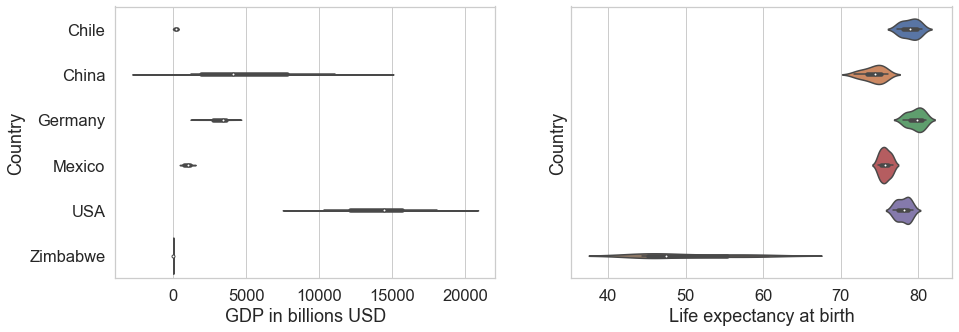

In [9]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,5))
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel("GDP in billions USD")
axes[1] = sns.violinplot(ax=axes[1], x=df.Expectancy, y=df.Country)
axes[1].set_xlabel("Life expectancy at birth")

To complement these violin plots, we could add a strip plot and overlay it on top of the violin plots. This would allow us to show dot density around the values, which would be especially helpful on the GDP chart.

Text(0.5, 0, 'Life expectancy at birth')

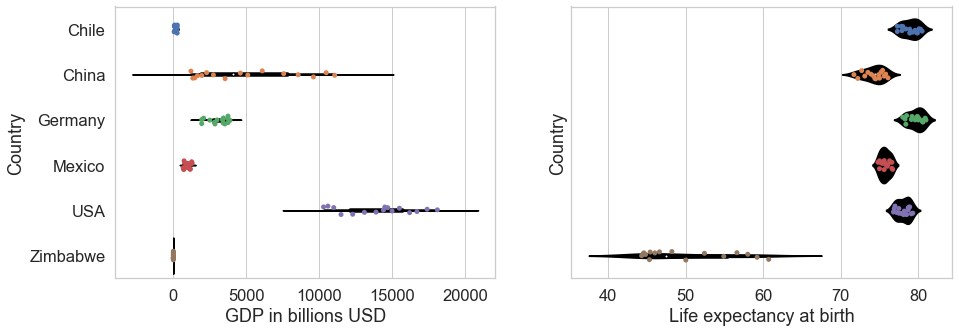

In [11]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,5))
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country, color="black")
axes[0] = sns.stripplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel("GDP in billions USD")
axes[1] = sns.violinplot(ax=axes[1], x=df.Expectancy, y=df.Country, color="black")
axes[1] = sns.stripplot(ax=axes[1], x=df.Expectancy, y=df.Country)
axes[1].set_xlabel("Life expectancy at birth")

Now, we are going to explore the relationship between GDP and Life Expectancy, by creating a scatter plot with L.E. on the x axis and GDP on the Y axis. 

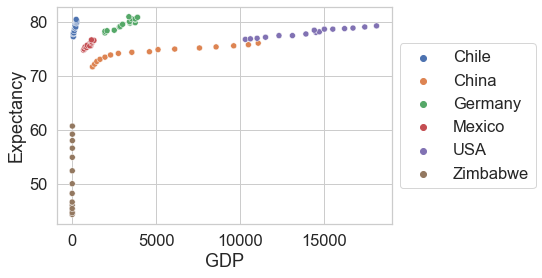

In [15]:
sns.scatterplot(x=df.GDP, y=df.Expectancy, hue=df.Country).legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=1)

## Conclusions

* Both life expectancy and GDP have increased gradually over these years.
* This increase depends on the country, though. On certain countries like the USA and China, GDP has increased rather dramatically. On the other hand, Zimbabwe has had a very significant increase in life expectancy.
* Overall, there seems to be a positive correlation between GDP and life expectancy. In some cases, such as Mexico, Germany, and the USA, it seems to have a linear correlation, as seen in the chart. In China, on the other hand, it has more of a logarithmic correlation.
* However, Chile and Zimbabwe challenge this correlation strongly. Both countries have a very low GDP compared to the others, which remained stagnant, but still presented increases in life expectancy, especially Zimbabwe. Chile had a very high life expectancy to begin with, and it only kept increasing even though its GDP did not. 
* It is particularly notable that, despite its GDP, Chile has a higher life expectancy at birth than both USA and China, and almost rivals Germany.
* More in-depth statistical analysis would have to be made in order to reach a conclusion about the relationship between GDP and life expectancy. The general idea seems to be positive correlation, but it's also evident that one can increase without the other.